<a href="https://colab.research.google.com/github/dasog94/PresumptionofMontlyRent/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


#한글 글꼴 추가

In [ ]:
# 나눔 고딕 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (37.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144865 files and di

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# 런타임 재시작을 해준다.

#Libs

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Load Data

In [ ]:
# df = pd.read_csv('/content/gdrive/My Drive/recommend_system/tracer/월세데이터.csv', encoding='CP949')

In [ ]:
# df = pd.read_csv('/content/gdrive/My Drive/recommend_system/tracer/Merged_data_v_2.csv', encoding='CP949')

In [20]:
df = pd.read_csv('/content/gdrive/My Drive/recommend_system/tracer/실거래데이터/merged_실거래.csv', encoding='CP949')

In [21]:
# 2020.05 강북권역 도심권 전월세전환율 
change_rate = 0.063

for i in range(len(df)):
  df.loc[i, '보증금(만원)'] = int(df.loc[i, '보증금(만원)'].replace(',', ''))
  df.loc[i, '보증금->월세'] = df.loc[i, '월세(만원)'] + int(df.loc[i, '보증금(만원)']) * change_rate / 12 

In [22]:
# 오리지널 df 확인용
# df_original = pd.read_csv('/content/gdrive/My Drive/recommend_system/tracer/월세데이터.csv', encoding='CP949')
# df_original[df_original['공시가격'] > 250000000].head(20)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   법정동명     1017 non-null   object 
 1   지번       1017 non-null   object 
 2   전월세구분    1017 non-null   object 
 3   전용면적(㎡)  1017 non-null   float64
 4   계약년월     1017 non-null   int64  
 5   보증금(만원)  1017 non-null   object 
 6   월세(만원)   1017 non-null   int64  
 7   계약층      1017 non-null   int64  
 8   건축년도     1017 non-null   int64  
 9   도로명      1017 non-null   object 
 10  세부용도명    407 non-null    object 
 11  지하층수     407 non-null    float64
 12  지상층수     407 non-null    float64
 13  사용승인일자   406 non-null    object 
 14  건물연령     406 non-null    float64
 15  주택구분명    407 non-null    object 
 16  건물산정연면적  7 non-null      float64
 17  주택가격     7 non-null      float64
 18  6평_가격    407 non-null    float64
 19  전용면적     400 non-null    float64
 20  공시가격     400 non-null    float64
 21  보증금->월세  1017 

In [24]:
df.head(5)

,법정동명,지번,전월세구분,전용면적(㎡),계약년월,보증금(만원),월세(만원),계약층,건축년도,도로명,세부용도명,지하층수,지상층수,사용승인일자,건물연령,주택구분명,건물산정연면적,주택가격,6평_가격,전용면적,공시가격,보증금->월세
0,서울특별시 종로구 동숭동,129-24,전세,38.54,201712,14000,0,4,1997,동숭4나길 28,다세대주택,1.0,4.0,1997-07-09,24.0,다세대,NaN,NaN,51782638.0,37.725,97675000.0,73.50
1,서울특별시 종로구 동숭동,129-74,전세,34.56,201803,20000,0,1,1994,낙산1길 22-1,다세대주택,1.0,3.0,1994-09-14,27.0,다세대,NaN,NaN,46701389.0,34.560,80700000.0,105.00
2,서울특별시 종로구 동숭동,130-7,월세,15.51,201806,1000,45,1,2014,동숭2길 13-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.25
3,서울특별시 종로구 동숭동,14-2,월세,25.60,201808,9000,10,4,1998,동숭4나길 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.25
4,서울특별시 종로구 동숭동,192-2,전세,52.85,201803,27000,0,3,1996,이화장길 86-20,연립주택,1.0,4.0,1996-04-24,25.0,빌라,NaN,NaN,55294731.0,38.340,106000000.0,141.75


In [25]:
# 6평 월세(target value) 칼럼 추가
peong = 20

for i in range(len(df)):
  # df.loc[i, '1m당_가격'] = df.loc[i, '보증금->월세'] / df.loc[i, '전용면적']
  df.loc[i, '6평_월세'] = df.loc[i, '보증금->월세'] / df.loc[i, '전용면적(㎡)'] * peong

In [26]:
# df = df.loc[:, ['법정동명', '건축년도', '층', '보증금(만원)', '계약년월', '전월세구분', '거주타입', '전용면적', '공시가격', '보증금->월세']]
# df = df.loc[:, ['법정동명', '도로명', '건축년도', '층', '보증금(만원)', '계약년월', '전월세구분', '거주타입', '전용면적', '공시가격', '보증금->월세']]
# df = df.loc[:, ['시군구', '번지', '건축년도', '층', '보증금(만원)', '계약년월', '전월세구분', '전용면적(㎡)', '공시가격', '보증금->월세']]

# df = df.dropna(axis=0)

In [27]:
len(df)

1017

In [28]:
df.head(10)

,법정동명,지번,전월세구분,전용면적(㎡),계약년월,보증금(만원),월세(만원),계약층,건축년도,도로명,세부용도명,지하층수,지상층수,사용승인일자,건물연령,주택구분명,건물산정연면적,주택가격,6평_가격,전용면적,공시가격,보증금->월세,6평_월세
0,서울특별시 종로구 동숭동,129-24,전세,38.54,201712,14000,0,4,1997,동숭4나길 28,다세대주택,1.0,4.0,1997-07-09,24.0,다세대,NaN,NaN,51782638.0,37.725,9.767500e+07,73.50,38.142190
1,서울특별시 종로구 동숭동,129-74,전세,34.56,201803,20000,0,1,1994,낙산1길 22-1,다세대주택,1.0,3.0,1994-09-14,27.0,다세대,NaN,NaN,46701389.0,34.560,8.070000e+07,105.00,60.763889
2,서울특별시 종로구 동숭동,130-7,월세,15.51,201806,1000,45,1,2014,동숭2길 13-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.25,64.796905
3,서울특별시 종로구 동숭동,14-2,월세,25.60,201808,9000,10,4,1998,동숭4나길 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.25,44.726562
4,서울특별시 종로구 동숭동,192-2,전세,52.85,201803,27000,0,3,1996,이화장길 86-20,연립주택,1.0,4.0,1996-04-24,25.0,빌라,NaN,NaN,55294731.0,38.340,1.060000e+08,141.75,53.642384
5,서울특별시 종로구 동숭동,199-20,월세,47.58,201801,3000,50,2,2001,이화장길 70-12,다세대주택,1.0,5.0,2001-12-19,20.0,다세대,NaN,NaN,55069995.0,23.478,6.464667e+07,65.75,27.637663
6,서울특별시 종로구 동숭동,199-20,월세,23.79,201810,3000,50,3,2001,이화장길 70-12,다세대주택,1.0,5.0,2001-12-19,20.0,다세대,NaN,NaN,55069995.0,23.478,6.464667e+07,65.75,55.275326
7,서울특별시 종로구 동숭동,2-3,전세,77.08,201802,21000,0,2,1988,동숭4가길 28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.25,28.606642
8,서울특별시 종로구 동숭동,25-2,전세,41.25,201801,3800,0,3,1987,동숭3길 38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.95,9.672727
9,서울특별시 종로구 동숭동,25-2,전세,41.25,201807,15000,0,3,1987,동숭3길 38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.75,38.181818


In [29]:
df.dtypes

법정동명        object
지번          object
전월세구분       object
전용면적(㎡)    float64
계약년월         int64
보증금(만원)     object
월세(만원)       int64
계약층          int64
건축년도         int64
도로명         object
세부용도명       object
지하층수       float64
지상층수       float64
사용승인일자      object
건물연령       float64
주택구분명       object
건물산정연면적    float64
주택가격       float64
6평_가격      float64
전용면적       float64
공시가격       float64
보증금->월세    float64
6평_월세      float64
dtype: object

In [30]:
#deleting points
df = df.drop(df[df['전용면적(㎡)'] > 40].index)
print(len(df))

623


In [31]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
주택가격,617,0.990369
건물산정연면적,617,0.990369
공시가격,302,0.484751
전용면적,302,0.484751
지하층수,296,0.475120
6평_가격,296,0.475120
주택구분명,296,0.475120
건물연령,296,0.475120
사용승인일자,296,0.475120
지상층수,296,0.475120


In [32]:
df = df.dropna(subset=['6평_가격'], axis=0)

In [33]:
#deleting points
df = df.drop(df[df['전용면적(㎡)'] > 40].index)
print(len(df))

327


In [34]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
주택가격,321,0.981651
건물산정연면적,321,0.981651
공시가격,6,0.018349
전용면적,6,0.018349
6평_월세,0,0.000000
건축년도,0,0.000000
지번,0,0.000000
전월세구분,0,0.000000
전용면적(㎡),0,0.000000
계약년월,0,0.000000


# One-hot Encoding

In [35]:
one_hot_list = ['법정동명', '전월세구분'] 

for col_name in one_hot_list:
  tmp = pd.get_dummies(df[col_name])
  df = pd.concat([df, tmp], axis = 1)
  df = df.drop(col_name, axis=1)

In [36]:
df.head(10)

,지번,전용면적(㎡),계약년월,보증금(만원),월세(만원),계약층,건축년도,도로명,세부용도명,지하층수,지상층수,사용승인일자,건물연령,주택구분명,건물산정연면적,주택가격,6평_가격,전용면적,공시가격,보증금->월세,6평_월세,서울특별시 성북구 동선동1가,서울특별시 성북구 동선동2가,서울특별시 성북구 동선동3가,서울특별시 성북구 동선동4가,서울특별시 성북구 동소문동1가,서울특별시 성북구 동소문동4가,서울특별시 성북구 동소문동6가,서울특별시 성북구 삼선동1가,서울특별시 성북구 성북동1가,서울특별시 종로구 동숭동,서울특별시 종로구 명륜1가,서울특별시 종로구 명륜2가,서울특별시 종로구 명륜3가,서울특별시 종로구 명륜4가,월세,전세
0,129-24,38.54,201712,14000,0,4,1997,동숭4나길 28,다세대주택,1.0,4.0,1997-07-09,24.0,다세대,NaN,NaN,51782638.0,37.725,9.767500e+07,73.500,38.142190,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,129-74,34.56,201803,20000,0,1,1994,낙산1길 22-1,다세대주택,1.0,3.0,1994-09-14,27.0,다세대,NaN,NaN,46701389.0,34.560,8.070000e+07,105.000,60.763889,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
6,199-20,23.79,201810,3000,50,3,2001,이화장길 70-12,다세대주택,1.0,5.0,2001-12-19,20.0,다세대,NaN,NaN,55069995.0,23.478,6.464667e+07,65.750,55.275326,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
13,4-100,19.20,201804,500,41,5,1996,동숭4라길 17-16,다세대주택,0.0,5.0,1996-12-13,25.0,다세대,NaN,NaN,43601143.0,25.192,5.492000e+07,43.625,45.442708,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
14,4-101,32.37,201811,4500,20,3,1996,동숭4라길 17-18,다세대주택,0.0,4.0,1996-04-23,25.0,다세대,NaN,NaN,46704133.0,28.470,6.648333e+07,43.625,26.953970,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
15,4-112,26.78,201804,13000,0,3,1997,동숭4라길 17,다세대주택,1.0,4.0,1997-03-14,24.0,다세대,NaN,NaN,43569828.0,26.780,5.834000e+07,68.250,50.970874,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
16,4-112,26.78,201806,1000,50,2,1997,동숭4라길 17,다세대주택,1.0,4.0,1997-03-14,24.0,다세대,NaN,NaN,43569828.0,26.780,5.834000e+07,55.250,41.262136,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
17,4-119,20.30,201809,5000,0,2,1996,동숭4다길 18,다세대주택,1.0,4.0,1996-12-06,25.0,다세대,NaN,NaN,41518061.0,21.870,4.540000e+07,26.250,25.862069,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
18,4-125,21.79,201805,500,40,2,1998,동숭4다길 19,다세대주택,1.0,4.0,1998-12-02,23.0,다세대,NaN,NaN,42441487.0,21.790,4.624000e+07,42.625,39.123451,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
19,4-146,30.27,201712,2000,40,2,2007,동숭4나길 31-6,다세대주택,1.0,4.0,2007-02-14,14.0,다세대,NaN,NaN,47743641.0,30.270,7.226000e+07,50.500,33.366369,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


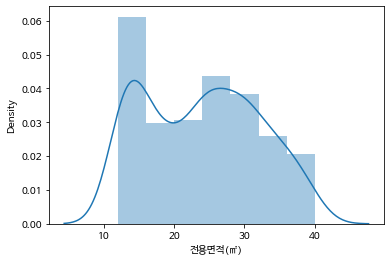

In [ ]:
sns.distplot(df['전용면적(㎡)']);

In [ ]:
print('월세 계약 개수 : ' + str(len(df[df['전월세구분'] == '월세'])))
print('전세 계약 개수 : ' + str(len(df[df['전월세구분'] == '전세'])))

월세 계약 개수 : 189
전세 계약 개수 : 138


#보증금 -> 월세 / 6평_가격

In [ ]:
df['보증금->월세'].describe()

count    327.000000
mean      61.977657
std       21.523963
min        7.625000
25%       48.212500
50%       60.250000
75%       68.703125
max      136.500000
Name: 보증금->월세, dtype: float64

In [ ]:
df['6평_월세'].describe()

count    327.000000
mean      57.299558
std       23.178540
min        4.927302
25%       38.092834
50%       55.275326
75%       77.557756
max      103.533279
Name: 6평_월세, dtype: float64

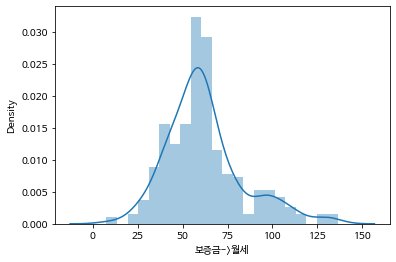

In [ ]:
sns.distplot(df['보증금->월세']);

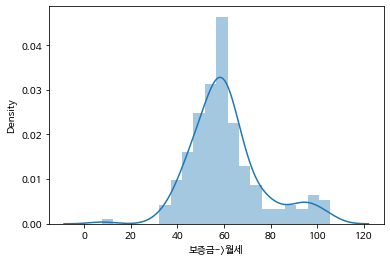

In [ ]:
sns.distplot(df[df['전월세구분'] == '월세']['보증금->월세']);

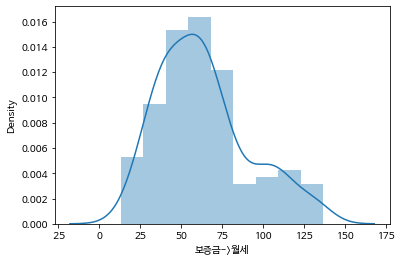

In [ ]:
sns.distplot(df[df['전월세구분'] == '전세']['보증금->월세']);

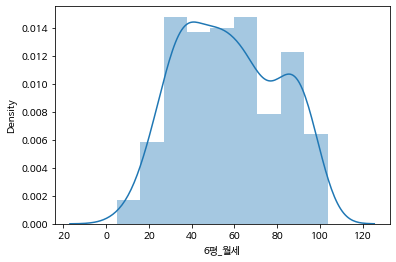

In [ ]:
sns.distplot(df['6평_월세']);

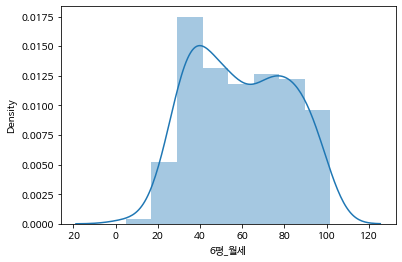

In [ ]:
sns.distplot(df[df['전월세구분'] == '월세']['6평_월세']);

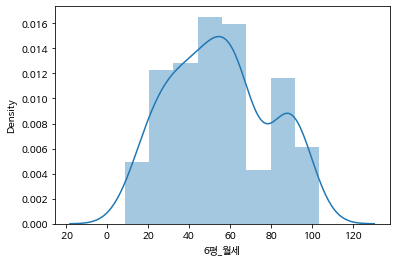

In [ ]:
sns.distplot(df[df['전월세구분'] == '전세']['6평_월세']);

In [ ]:
#skewness and kurtosis
print("Skewness: {}".format(df['보증금->월세'].skew()))
print("Kurtosis: {}".format(df['보증금->월세'].kurt()))

Skewness: 0.9185638726157888
Kurtosis: 1.221479498244661


In [ ]:
#skewness and kurtosis
print("Skewness: {}".format(df['6평_월세'].skew()))
print("Kurtosis: {}".format(df['6평_월세'].kurt()))

Skewness: 0.1097730479176192
Kurtosis: -1.0094156657695752


#산포도(공시가격, 1m당_가격)

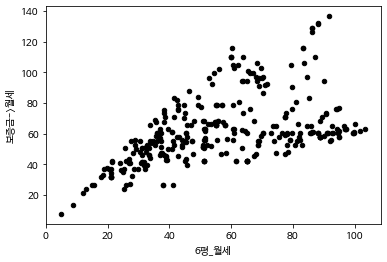

In [ ]:
x_axis = '6평_월세'
y_axis = '보증금->월세'
data = pd.concat([df[y_axis], df[x_axis]], axis=1)
data.plot.scatter(x=x_axis, y=y_axis, c=np.array([0, 0, 0]).reshape(1,-1));

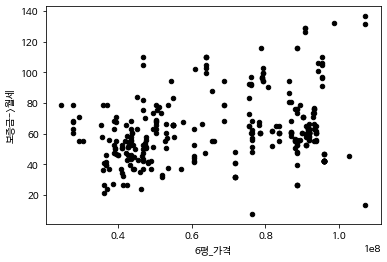

In [ ]:
x_axis = '6평_가격'
y_axis = '보증금->월세'
data = pd.concat([df[y_axis], df[x_axis]], axis=1)
data.plot.scatter(x=x_axis, y=y_axis, c=np.array([0, 0, 0]).reshape(1,-1));

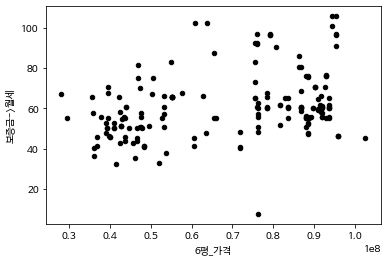

In [ ]:
x_axis = '6평_가격'
y_axis = '보증금->월세'
data = pd.concat([df[df['전월세구분'] == '월세'][y_axis], df[df['전월세구분'] == '월세'][x_axis]], axis=1)
data.plot.scatter(x=x_axis, y=y_axis, c=np.array([0, 0, 0]).reshape(1,-1));

In [ ]:
df[df['6평_가격'] > 120000000].head(10)

,법정동명,지번,전월세구분,전용면적(㎡),계약년월,보증금(만원),월세(만원),층,건축년도,도로명,주택구분명,건물산정연면적,주택가격,6평_가격,전용면적,공시가격,보증금->월세,6평_월세
153,서울특별시 종로구 명륜1가,16-5,전세,29.82,201807,27000,0,2,2018,성균관로 62-13,다세대,NaN,NaN,138832998.0,29.820,207000000.0,141.750,95.070423
154,서울특별시 종로구 명륜1가,16-5,전세,59.65,201809,40000,0,3,2018,성균관로 62-13,다세대,NaN,NaN,138832998.0,29.820,207000000.0,210.000,70.410729
178,서울특별시 종로구 명륜1가,16-4,전세,29.72,201909,27000,0,2,2018,성균관로14길 26,다세대,NaN,NaN,138627187.0,29.720,206000000.0,141.750,95.390310
179,서울특별시 종로구 명륜1가,16-5,전세,59.65,201910,40000,0,2,2018,성균관로 62-13,다세대,NaN,NaN,138832998.0,29.820,207000000.0,210.000,70.410729
300,서울특별시 종로구 명륜4가,70-7,전세,51.79,201808,15000,0,5,2018,대학로11길 38-7,다세대,NaN,NaN,136672023.0,28.005,191375000.0,78.750,30.411276
301,서울특별시 종로구 명륜4가,70-7,전세,29.90,201810,29000,0,3,2018,대학로11길 38-7,다세대,NaN,NaN,136672023.0,28.005,191375000.0,152.250,101.839465
302,서울특별시 종로구 명륜4가,70-13,전세,45.35,201807,37500,0,5,2018,대학로11길 38-9,다세대,NaN,NaN,134213112.0,35.615,239000000.0,196.875,86.824697
307,서울특별시 종로구 명륜4가,70-7,전세,29.48,201902,26000,0,3,2018,대학로11길 38-7,다세대,NaN,NaN,136672023.0,28.005,191375000.0,136.500,92.605156
308,서울특별시 종로구 명륜4가,70-7,전세,29.64,201902,24000,0,2,2018,대학로11길 38-7,다세대,NaN,NaN,136672023.0,28.005,191375000.0,126.000,85.020243
315,서울특별시 종로구 명륜4가,70-7,전세,29.48,202008,28000,0,2,2018,대학로11길 38-7,다세대,NaN,NaN,136672023.0,28.005,191375000.0,147.000,99.728630


In [ ]:
df[df['공시가격'] > 250000000].head()

,법정동명,건축년도,층,보증금(만원),계약년월,전월세구분,거주타입,전용면적,공시가격,보증금->월세,1m당_가격,log_보증금->월세,log_공시가격
539,서울특별시 종로구 명륜2가,2019,6,1000.0,201907,월세,아파트&오피스텔,39.83,358000000.0,76.333333,1.916478,4.335110,19.696044
540,서울특별시 종로구 명륜2가,2019,9,1000.0,201907,월세,아파트&오피스텔,39.83,358000000.0,76.333333,1.916478,4.335110,19.696044
608,서울특별시 종로구 명륜2가,2019,5,1000.0,202001,월세,아파트&오피스텔,39.83,358000000.0,76.333333,1.916478,4.335110,19.696044
610,서울특별시 종로구 명륜2가,2019,10,1000.0,202003,월세,아파트&오피스텔,28.68,266000000.0,71.333333,2.487215,4.267364,19.399007
611,서울특별시 종로구 명륜2가,2019,4,1000.0,202002,월세,아파트&오피스텔,33.24,304000000.0,76.333333,2.296430,4.335110,19.532538


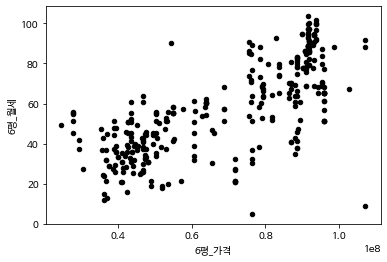

In [ ]:
x_axis = '6평_가격'
y_axis = '6평_월세'
data = pd.concat([df[y_axis], df[x_axis]], axis=1)
data.plot.scatter(x=x_axis, y=y_axis, c=np.array([0, 0, 0]).reshape(1,-1));

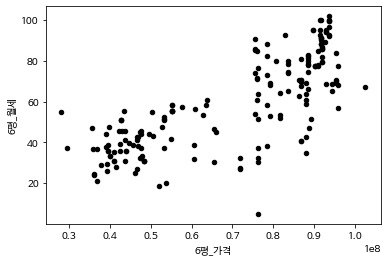

In [ ]:
x_axis = '6평_가격'
y_axis = '6평_월세'
data = pd.concat([df[df['전월세구분'] == '월세'][y_axis], df[df['전월세구분'] == '월세'][x_axis]], axis=1)
data.plot.scatter(x=x_axis, y=y_axis, c=np.array([0, 0, 0]).reshape(1,-1));

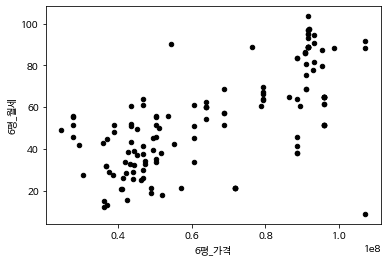

In [ ]:
x_axis = '6평_가격'
y_axis = '6평_월세'
data = pd.concat([df[df['전월세구분'] == '전세'][y_axis], df[df['전월세구분'] == '전세'][x_axis]], axis=1)
data.plot.scatter(x=x_axis, y=y_axis, c=np.array([0, 0, 0]).reshape(1,-1));

#산포도(전용면적)

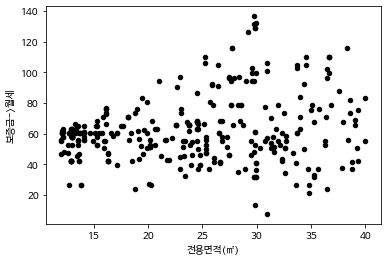

In [ ]:
x_axis = '전용면적(㎡)'
y_axis = '보증금->월세'
data = pd.concat([df[y_axis], df[x_axis]], axis=1)
data.plot.scatter(x=x_axis, y=y_axis, c=np.array([0, 0, 0]).reshape(1,-1));

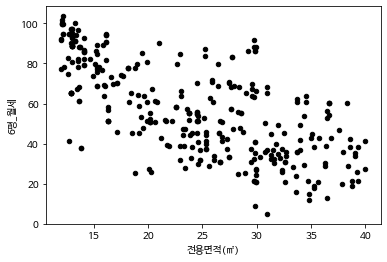

In [ ]:
x_axis = '전용면적(㎡)'
y_axis = '6평_월세'
data = pd.concat([df[y_axis], df[x_axis]], axis=1)
data.plot.scatter(x=x_axis, y=y_axis, c=np.array([0, 0, 0]).reshape(1,-1));

#산포도(보증금)

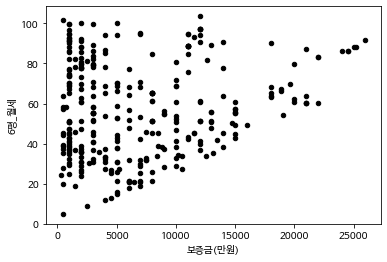

In [ ]:
x_axis = '보증금(만원)'
y_axis = '6평_월세'
data = pd.concat([df[y_axis], df[x_axis]], axis=1)
data.plot.scatter(x=x_axis, y=y_axis, c=np.array([0, 0, 0]).reshape(1,-1));

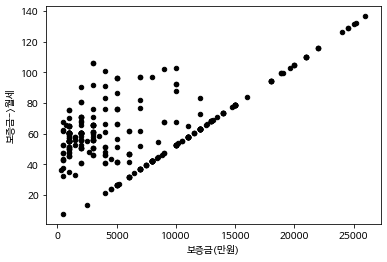

In [ ]:
x_axis = '보증금(만원)'
y_axis = '보증금->월세'
data = pd.concat([df[y_axis], df[x_axis]], axis=1)
data.plot.scatter(x=x_axis, y=y_axis, c=np.array([0, 0, 0]).reshape(1,-1));

#산포도(3가지 거리)

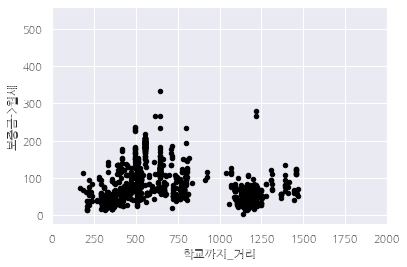

In [ ]:
#scatter plot '공시가격'/'보증금->월세'
var = '학교까지_거리'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
data.plot.scatter(x=var, y='보증금->월세', xlim=(0, 2000), c=np.array([0, 0, 0]).reshape(1,-1));

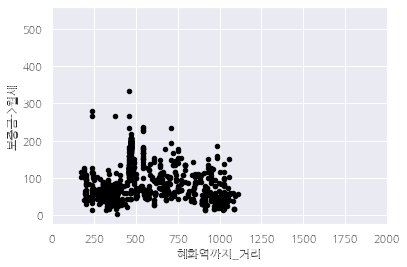

In [ ]:
#scatter plot '공시가격'/'보증금->월세'
var = '혜화역까지_거리'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
data.plot.scatter(x=var, y='보증금->월세', xlim=(0, 2000), c=np.array([0, 0, 0]).reshape(1,-1));

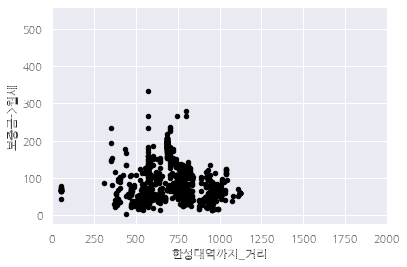

In [ ]:
#scatter plot '공시가격'/'보증금->월세'
var = '한성대역까지_거리'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
data.plot.scatter(x=var, y='보증금->월세', xlim=(0, 2000), c=np.array([0, 0, 0]).reshape(1,-1));

# 상자 수염 그림 (전세/월세)

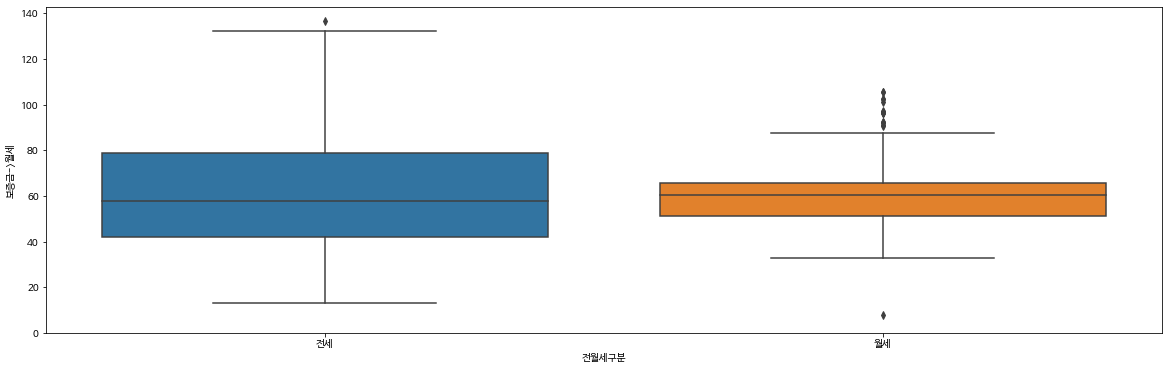

In [ ]:
var = '전월세구분'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="보증금->월세", data=data)
fig.axis(ymin=0);

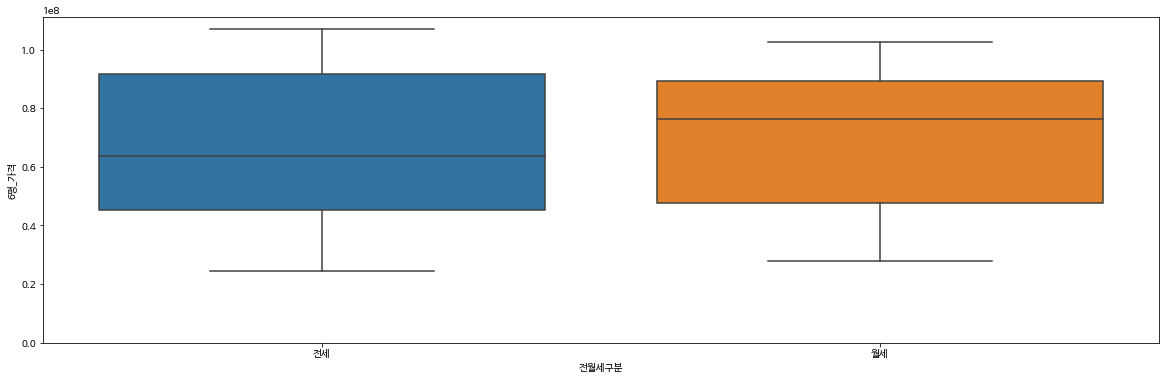

In [ ]:
#box plot overallqual/saleprice
var = '전월세구분'
data = pd.concat([df['6평_가격'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="6평_가격", data=data)
fig.axis(ymin=0);

# 상자 수염 그림 (법정동명)

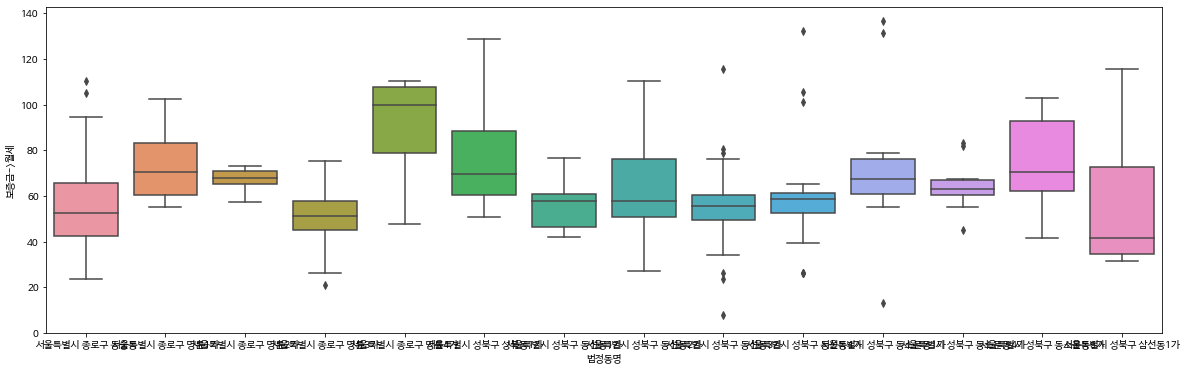

In [ ]:
var = '법정동명'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="보증금->월세", data=data)
fig.axis(ymin=0);

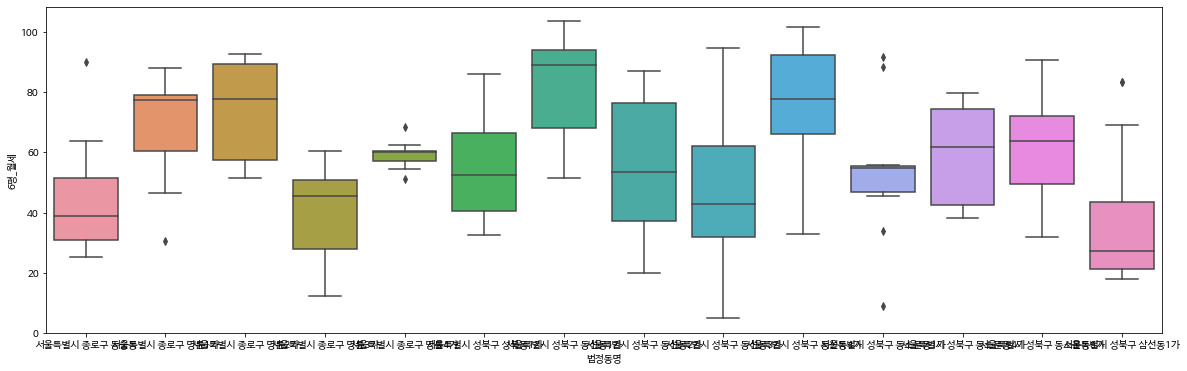

In [ ]:
var = '법정동명'
data = pd.concat([df['6평_월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="6평_월세", data=data)
fig.axis(ymin=0);

# 상자 수염 그림 (층, 전월세구분, 거주타입, 계약년월)

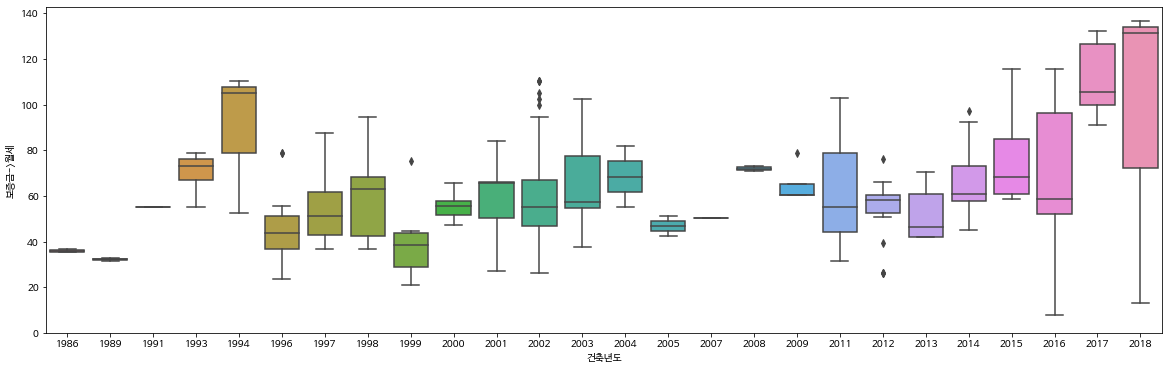

In [ ]:
#box plot overallqual/saleprice
var = '건축년도'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="보증금->월세", data=data)
fig.axis(ymin=0);

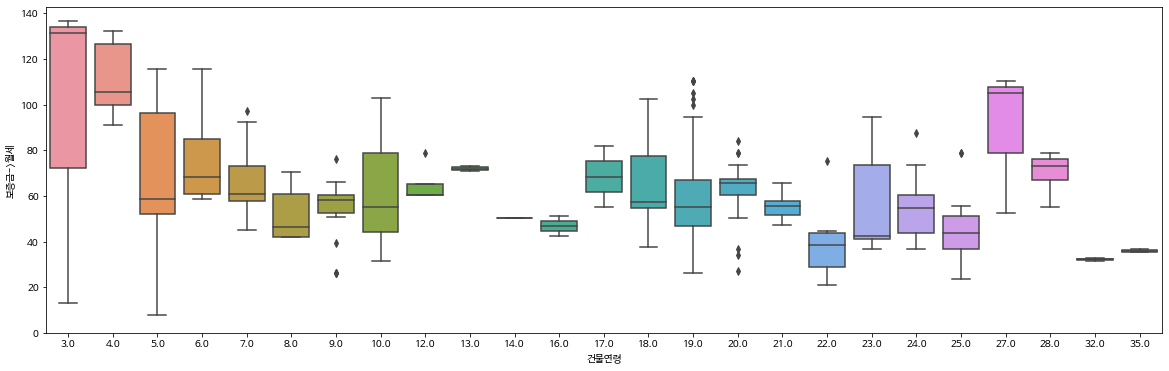

In [ ]:
#box plot overallqual/saleprice
var = '건물연령'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="보증금->월세", data=data)
fig.axis(ymin=0);

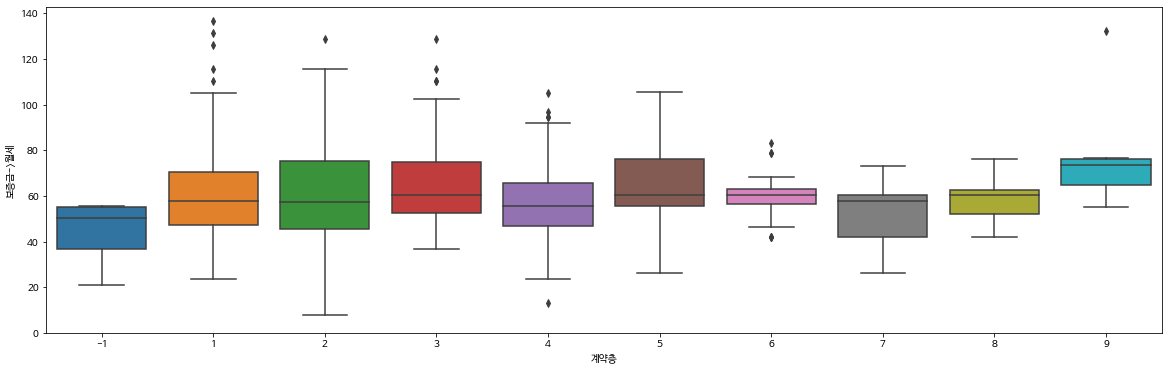

In [ ]:
var = '계약층'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="보증금->월세", data=data)
fig.axis(ymin=0);

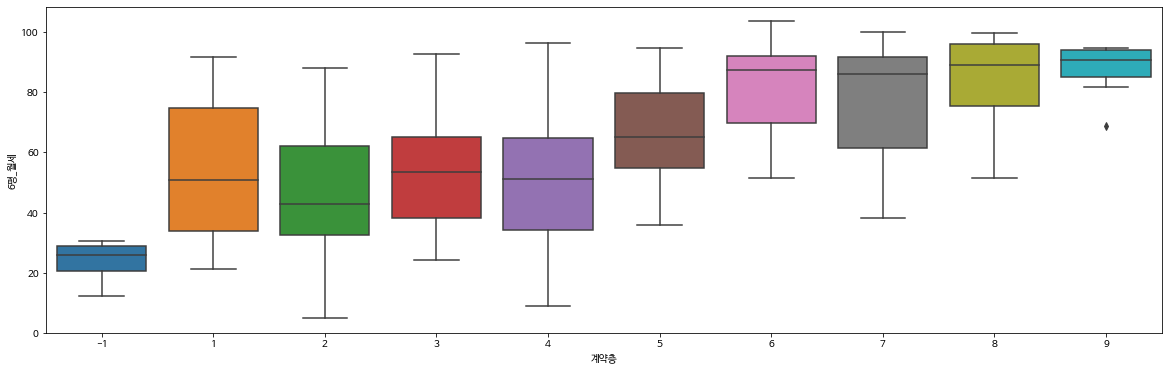

In [ ]:
var = '계약층'
data = pd.concat([df['6평_월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y='6평_월세', data=data)
fig.axis(ymin=0);

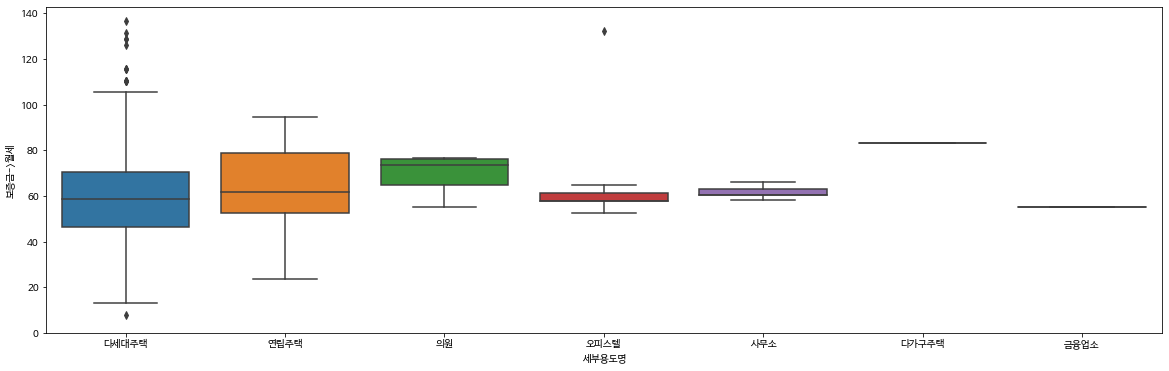

In [ ]:
var = '세부용도명'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="보증금->월세", data=data)
fig.axis(ymin=0);

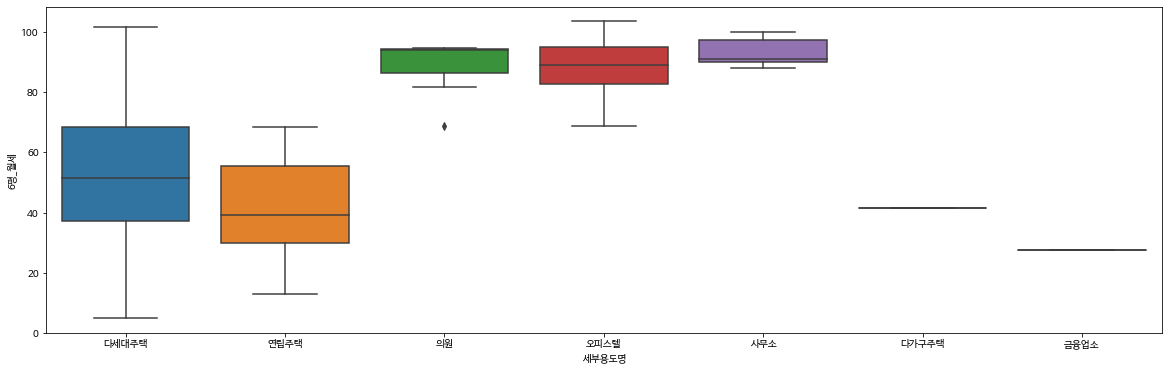

In [ ]:
var = '세부용도명'
data = pd.concat([df['6평_월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="6평_월세", data=data)
fig.axis(ymin=0);

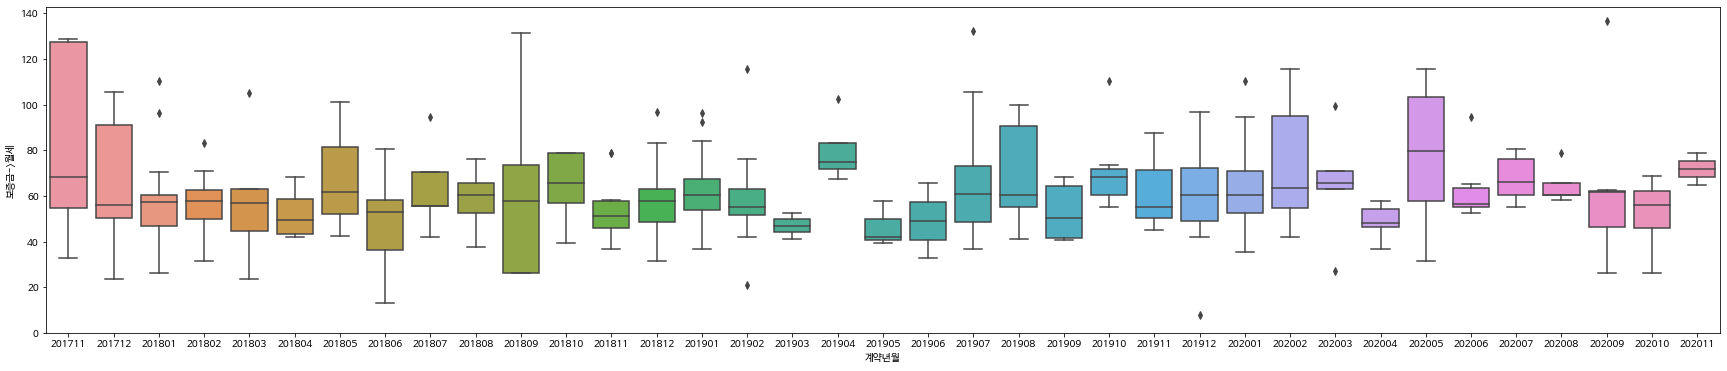

In [ ]:
var = '계약년월'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(30, 6))
fig = sns.boxplot(x=var, y="보증금->월세", data=data)
fig.axis(ymin=0);

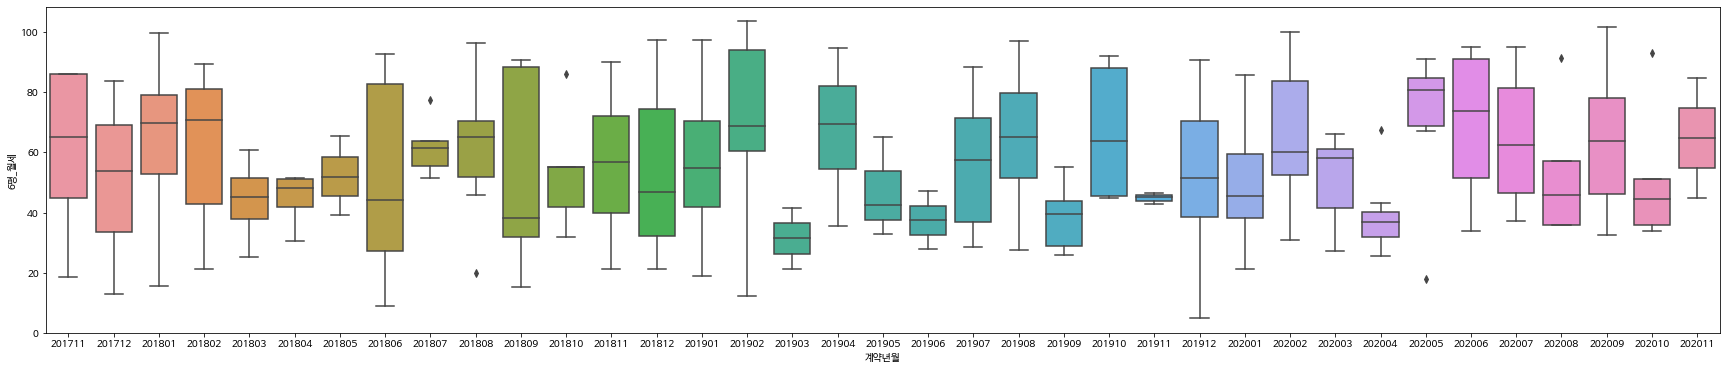

In [ ]:
var = '계약년월'
data = pd.concat([df['6평_월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(30, 6))
fig = sns.boxplot(x=var, y="6평_월세", data=data)
fig.axis(ymin=0);

#상자 수염 그림(건축년도)

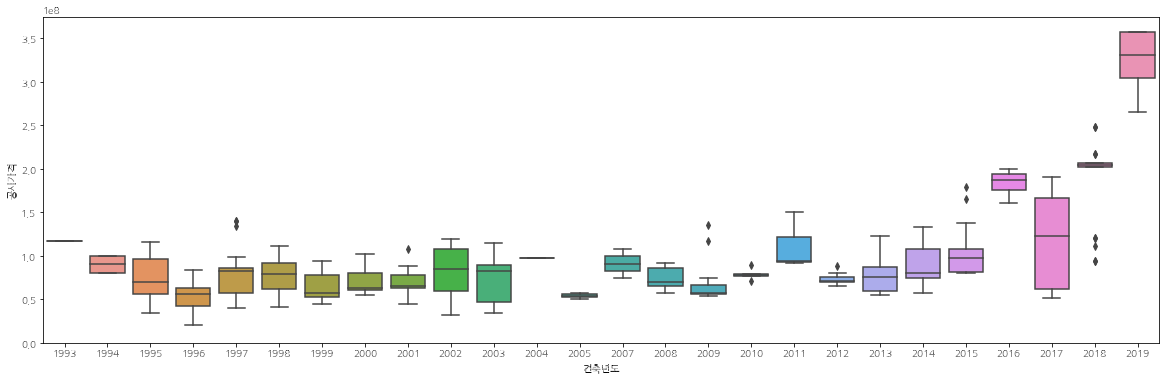

In [ ]:
x_axis = '건축년도'
y_axis = '공시가격'
data = pd.concat([df[y_axis], df[x_axis]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=x_axis, y=y_axis, data=data)
fig.axis(ymin=0);

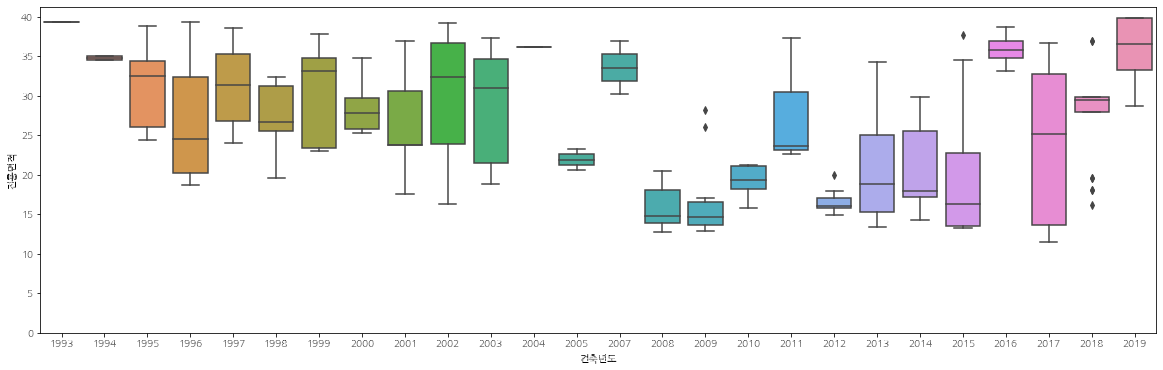

In [ ]:
x_axis = '건축년도'
y_axis = '전용면적'
data = pd.concat([df[y_axis], df[x_axis]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=x_axis, y=y_axis, data=data)
fig.axis(ymin=0);

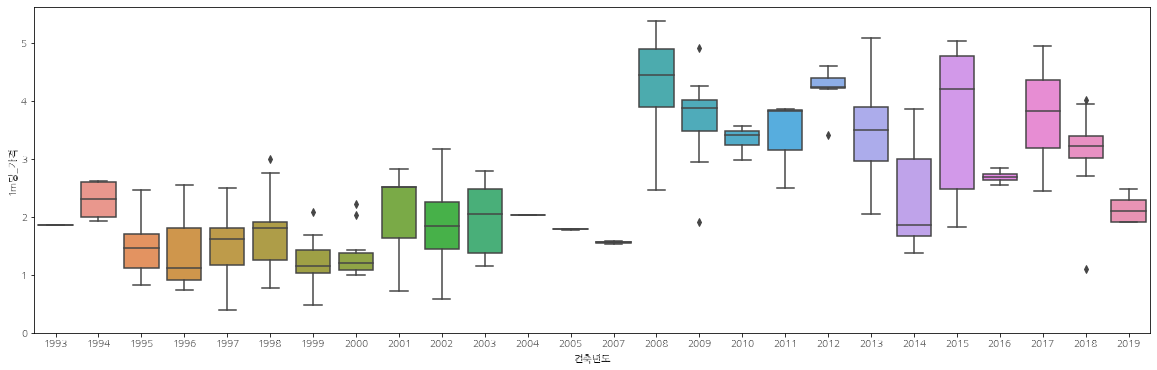

In [ ]:
x_axis = '건축년도'
y_axis = '1m당_가격'
data = pd.concat([df[y_axis], df[x_axis]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=x_axis, y=y_axis, data=data)
fig.axis(ymin=0);

#Correlation matrix

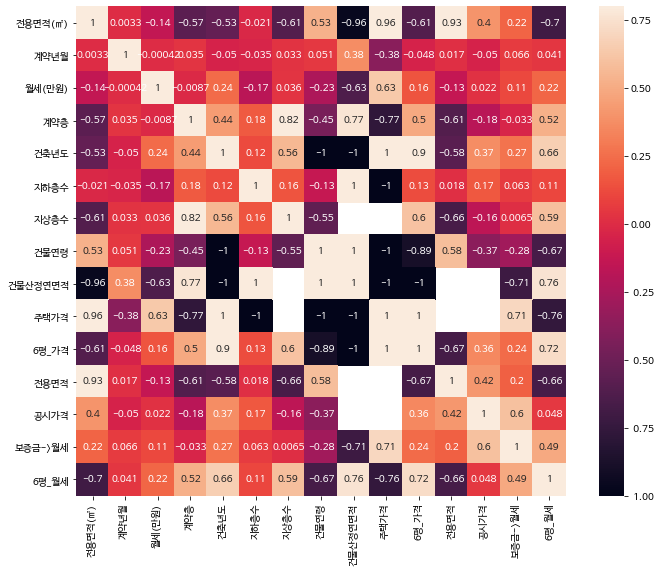

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

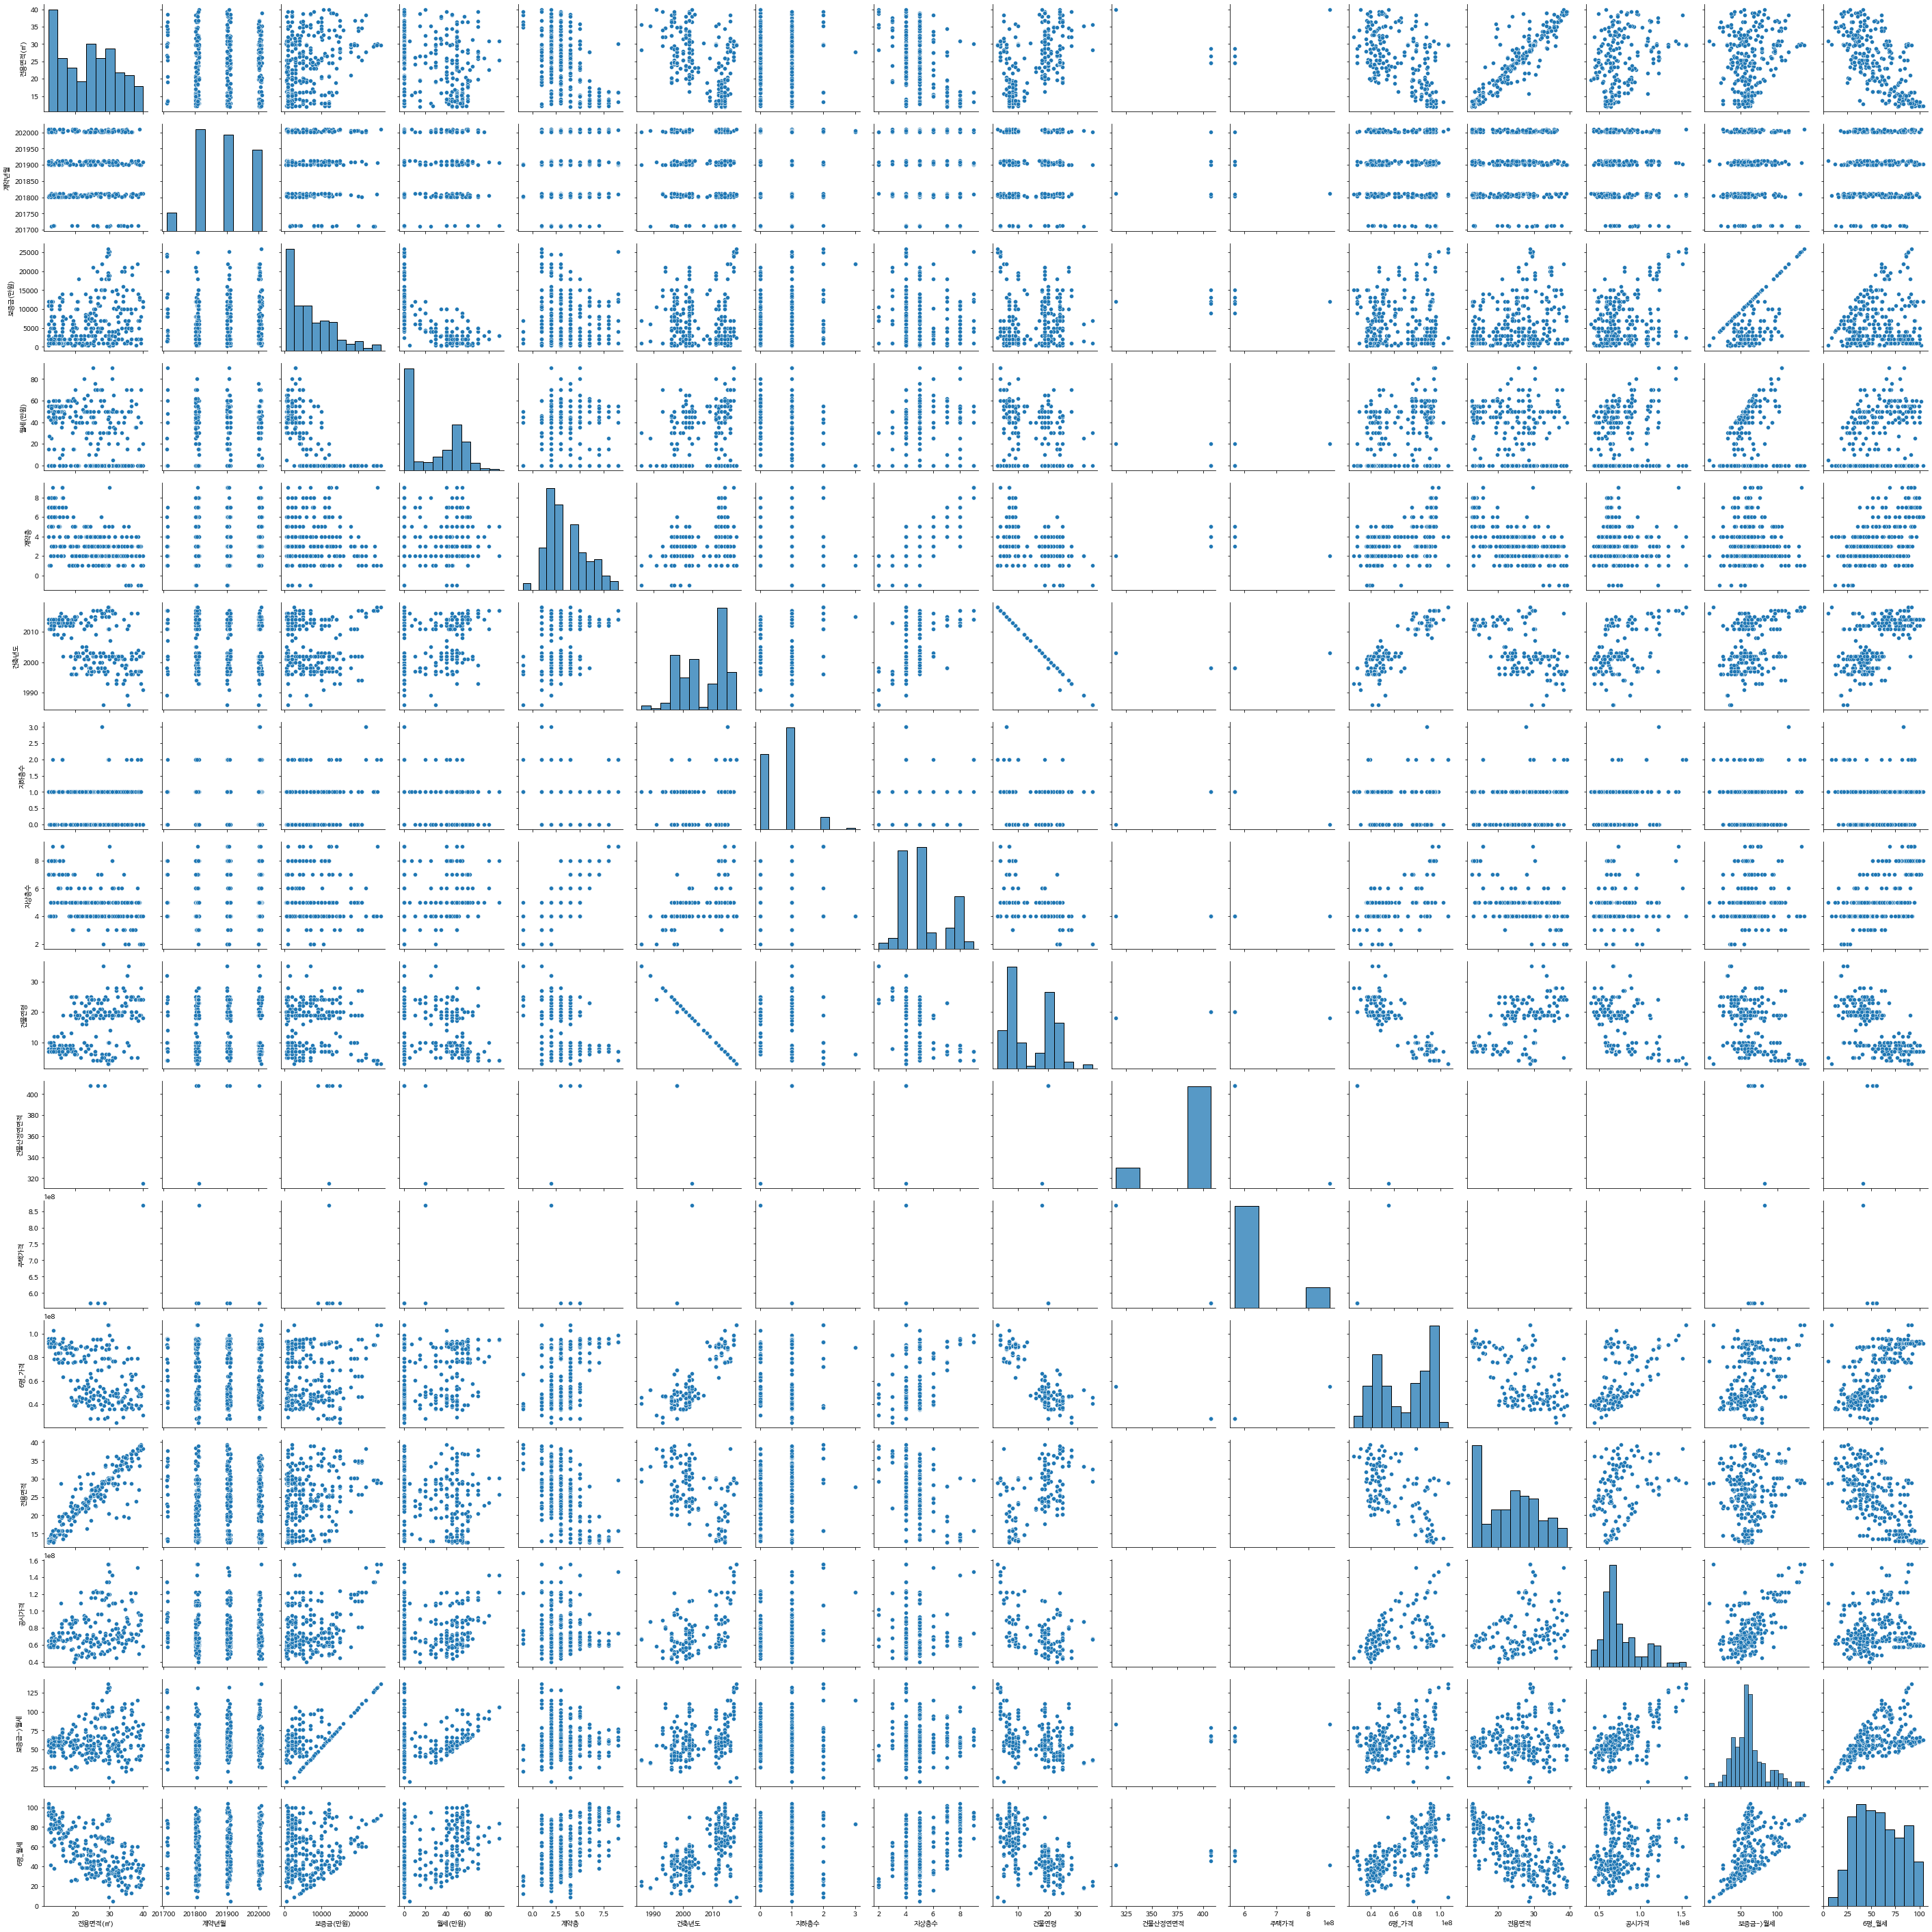

In [ ]:
sns.pairplot(df, size = 2.5)
plt.show();

#Missing Data

In [ ]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
주택가격,321,0.981651
건물산정연면적,321,0.981651
공시가격,6,0.018349
전용면적,6,0.018349
6평_월세,0,0.000000
건축년도,0,0.000000
지번,0,0.000000
전월세구분,0,0.000000
전용면적(㎡),0,0.000000
계약년월,0,0.000000


In [ ]:
df = df.drop((missing_data[missing_data['Total'] > 40]).index,1)
df = df.drop(df.loc[df['공시가격'].isnull()].index)
df = df.drop((missing_data[missing_data['Total'] > 1]).index, 1)
df.isnull().sum().max() #just checking that there's no missing data missing...

0

#Outlier

Univariate analysis

In [ ]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df['6평_월세'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-2.26297773]
 [-2.09640955]
 [-1.9542403 ]
 [-1.91560733]
 [-1.82382941]
 [-1.80053482]
 [-1.70384843]
 [-1.67014847]
 [-1.65756476]
 [-1.61728523]]

outer range (high) of the distribution:
[[1.71533547]
 [1.73153029]
 [1.73153029]
 [1.8236552 ]
 [1.8236552 ]
 [1.83796271]
 [1.84149561]
 [1.84506369]
 [1.92177746]
 [1.9977348 ]]


Bivariate analysis

In [ ]:
len(df)

327

In [ ]:
df.sort_values(by = '6평_가격', ascending = False)[:20]

,법정동명,지번,전월세구분,전용면적(㎡),계약년월,보증금(만원),월세(만원),계약층,건축년도,도로명,세부용도명,지하층수,지상층수,사용승인일자,건물연령,주택구분명,건물산정연면적,주택가격,6평_가격,전용면적,공시가격,보증금->월세,6평_월세
577,서울특별시 성북구 동소문동1가,140-27,전세,29.89,201806,2500,0,4,2018,동소문로3길 39,다세대주택,2.0,4.0,2018-06-15,3.0,다세대,NaN,NaN,107084020.0,28.949231,1.550000e+08,13.125,8.782201
647,서울특별시 성북구 동소문동1가,140-27,전세,29.72,202009,26000,0,1,2018,동소문로3길 39,다세대주택,2.0,4.0,2018-06-15,3.0,다세대,NaN,NaN,107084020.0,28.949231,1.550000e+08,136.500,91.857335
579,서울특별시 성북구 동소문동1가,140-27,전세,29.72,201809,25000,0,1,2018,동소문로3길 39,다세대주택,2.0,4.0,2018-06-15,3.0,다세대,NaN,NaN,107084020.0,28.949231,1.550000e+08,131.250,88.324361
380,서울특별시 성북구 동선동2가,9,월세,13.44,202004,1000,40,4,2014,동소문로22길 60,다세대주택,0.0,5.0,2014-04-29,7.0,다세대,NaN,NaN,102607436.0,13.806667,7.083333e+07,45.250,67.336310
483,서울특별시 성북구 동선동4가,169,전세,29.98,201907,25200,0,9,2017,동소문로23길 16-12,오피스텔,1.0,9.0,2017-07-26,4.0,다세대,NaN,NaN,98686426.0,29.690000,1.465000e+08,132.300,88.258839
350,서울특별시 성북구 동선동1가,85-65,전세,12.92,201912,8000,0,7,2013,동소문로24길 36,다세대주택,1.0,8.0,2013-03-15,8.0,다세대,NaN,NaN,95848155.0,13.453571,6.447500e+07,42.000,65.015480
351,서울특별시 성북구 동선동1가,85-65,전세,16.35,202002,8000,0,7,2013,동소문로24길 36,다세대주택,1.0,8.0,2013-03-15,8.0,다세대,NaN,NaN,95848155.0,13.453571,6.447500e+07,42.000,51.376147
352,서울특별시 성북구 동선동1가,85-65,월세,12.01,202002,6000,15,7,2013,동소문로24길 36,다세대주택,1.0,8.0,2013-03-15,8.0,다세대,NaN,NaN,95848155.0,13.453571,6.447500e+07,46.500,77.435470
353,서울특별시 성북구 동선동1가,85-65,전세,16.35,202009,8000,0,8,2013,동소문로24길 36,다세대주택,1.0,8.0,2013-03-15,8.0,다세대,NaN,NaN,95848155.0,13.453571,6.447500e+07,42.000,51.376147
427,서울특별시 성북구 동선동1가,85-65,월세,13.67,201901,6000,15,6,2013,동소문로24길 36,다세대주택,1.0,8.0,2013-03-15,8.0,다세대,NaN,NaN,95848155.0,13.453571,6.447500e+07,46.500,68.032187


In [ ]:
df.sort_values(by = '보증금->월세', ascending = False)[:100]

,법정동명,지번,전월세구분,전용면적(㎡),계약년월,보증금(만원),월세(만원),계약층,건축년도,도로명,세부용도명,지하층수,지상층수,사용승인일자,건물연령,주택구분명,건물산정연면적,주택가격,6평_가격,전용면적,공시가격,보증금->월세,6평_월세
647,서울특별시 성북구 동소문동1가,140-27,전세,29.72,202009,26000,0,1,2018,동소문로3길 39,다세대주택,2.0,4.0,2018-06-15,3.0,다세대,NaN,NaN,107084020.0,28.949231,1.550000e+08,136.500,91.857335
483,서울특별시 성북구 동선동4가,169,전세,29.98,201907,25200,0,9,2017,동소문로23길 16-12,오피스텔,1.0,9.0,2017-07-26,4.0,다세대,NaN,NaN,98686426.0,29.690000,1.465000e+08,132.300,88.258839
579,서울특별시 성북구 동소문동1가,140-27,전세,29.72,201809,25000,0,1,2018,동소문로3길 39,다세대주택,2.0,4.0,2018-06-15,3.0,다세대,NaN,NaN,107084020.0,28.949231,1.550000e+08,131.250,88.324361
319,서울특별시 성북구 성북동1가,106-37,전세,29.86,201711,24500,0,2,2017,성북로5길 45-4,다세대주택,1.0,4.0,2017-10-11,4.0,다세대,NaN,NaN,90693739.0,29.550000,1.340000e+08,128.625,86.152043
318,서울특별시 성북구 성북동1가,106-37,전세,29.86,201711,24500,0,3,2017,성북로5길 45-4,다세대주택,1.0,4.0,2017-10-11,4.0,다세대,NaN,NaN,90693739.0,29.550000,1.340000e+08,128.625,86.152043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,서울특별시 종로구 동숭동,189-2,월세,25.17,201901,5000,40,3,2002,동숭1길 20,다세대주택,0.0,5.0,2002-12-31,19.0,다세대,NaN,NaN,53092727.0,27.209000,7.223000e+07,66.250,52.642034
349,서울특별시 성북구 동선동1가,2-5,전세,16.18,202007,12600,0,9,2014,동소문로20가길 12,의원,2.0,9.0,2014-09-18,7.0,빌라,NaN,NaN,93029440.0,15.795000,7.347000e+07,66.150,81.767614
366,서울특별시 성북구 동선동2가,142,월세,24.65,202001,4000,45,4,2012,보문로30길 72,다세대주택,0.0,4.0,2012-11-27,9.0,다세대,NaN,NaN,62787136.0,18.501667,5.808333e+07,66.000,53.549696
93,서울특별시 종로구 동숭동,199-20,월세,23.79,202001,3000,50,4,2001,이화장길 70-12,다세대주택,1.0,5.0,2001-12-19,20.0,다세대,NaN,NaN,55069995.0,23.478000,6.464667e+07,65.750,55.275326


In [ ]:
df.sort_values(by = '1m당_가격', ascending = False)[:20]

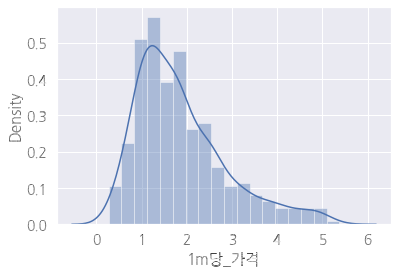

In [ ]:
sns.distplot(df['1m당_가격']);

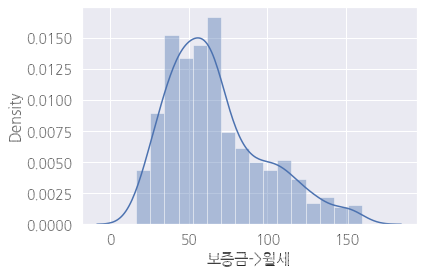

In [ ]:
sns.distplot(df['보증금->월세']);

In [ ]:
#deleting points
df = df.drop(df[df['보증금->월세'] > 160].index)

#Normality

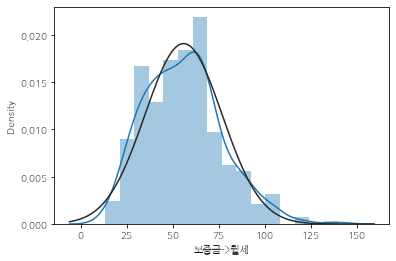

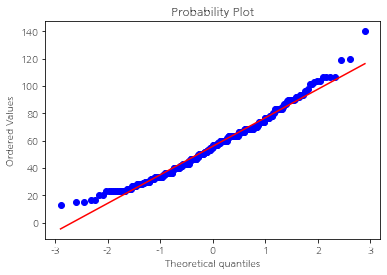

In [ ]:
#histogram and normal probability plot
sns.distplot(df['보증금->월세'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['보증금->월세'], plot=plt)

In [ ]:
#skewness and kurtosis
print("Skewness: {}".format(df['보증금->월세'].skew()))
print("Kurtosis: {}".format(df['보증금->월세'].kurt()))

Skewness: 0.5207112446646254
Kurtosis: 0.3500643576722031


In [ ]:
df['log_보증금->월세'] = np.log(df['보증금->월세'])

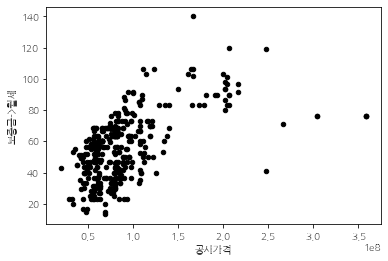

In [ ]:
#scatter plot '공시가격'/'보증금->월세'
var = '공시가격'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
data.plot.scatter(x=var, y='보증금->월세', c=np.array([0, 0, 0]).reshape(1,-1));

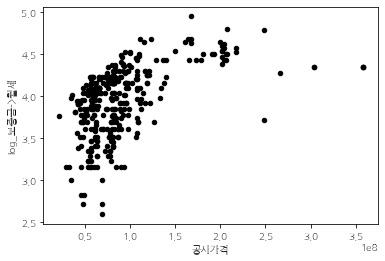

In [ ]:
#scatter plot '공시가격'/'보증금->월세'
var = '공시가격'
data = pd.concat([df['log_보증금->월세'], df[var]], axis=1)
data.plot.scatter(x=var, y='log_보증금->월세', c=np.array([0, 0, 0]).reshape(1,-1));

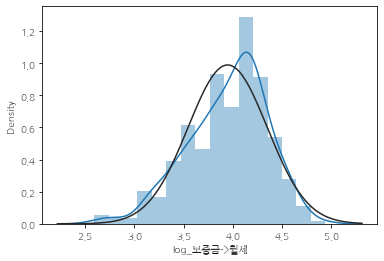

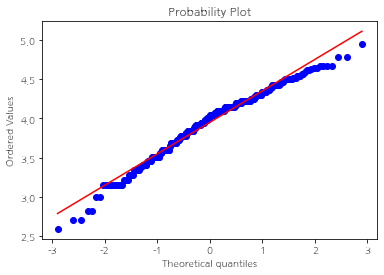

In [ ]:
#histogram and normal probability plot
sns.distplot(df['log_보증금->월세'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['log_보증금->월세'], plot=plt)

In [ ]:
#skewness and kurtosis
print("Skewness: {}".format(df['log_보증금->월세'].skew()))
print("Kurtosis: {}".format(df['log_보증금->월세'].kurt()))

Skewness: -0.54270217362873
Kurtosis: 0.1700629013574657


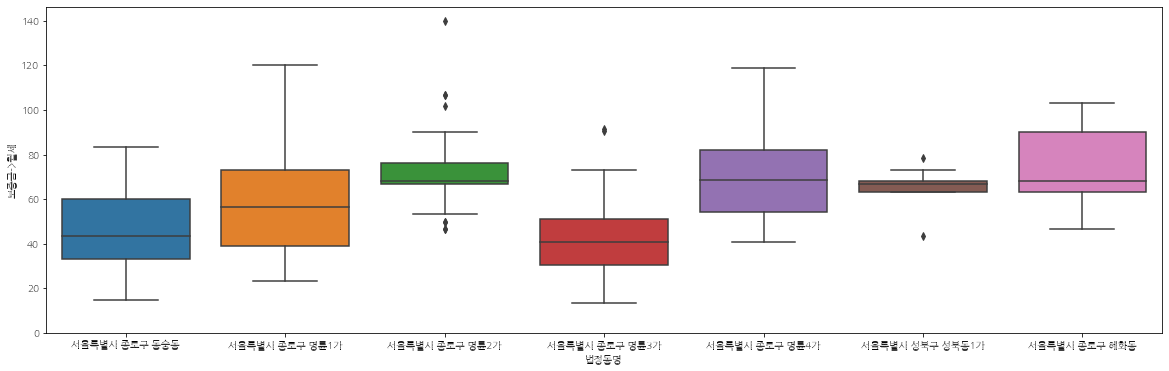

In [ ]:
#box plot overallqual/saleprice
var = '법정동명'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="보증금->월세", data=data)
fig.axis(ymin=0);

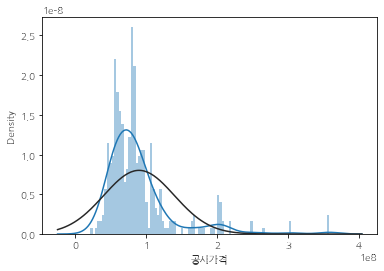

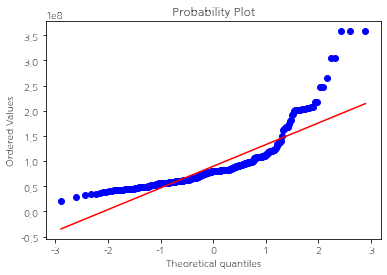

In [ ]:
#histogram and normal probability plot
sns.distplot(df['공시가격'], fit=norm, norm_hist=True, bins=100);
fig = plt.figure()
res = stats.probplot(df['공시가격'], plot=plt)

In [ ]:
df['log_공시가격'] = np.log(df['공시가격'])

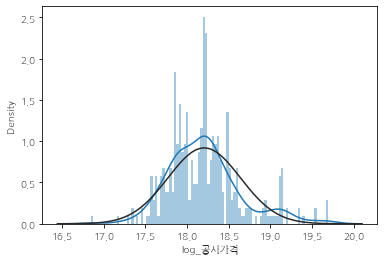

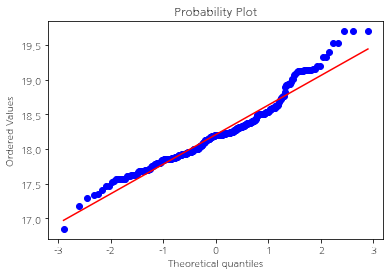

In [ ]:
#histogram and normal probability plot
sns.distplot(df['log_공시가격'], fit=norm, norm_hist=True, bins=100);
fig = plt.figure()
res = stats.probplot(df['log_공시가격'], plot=plt)

In [ ]:
#deleting points
df = df.drop(df[df['log_보증금->월세'] < 2.8].index)

#Homoscedasticity

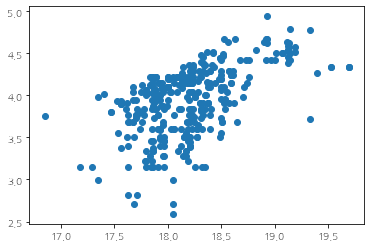

In [ ]:
#scatter plot
plt.scatter(df['log_공시가격'], df['log_보증금->월세']);

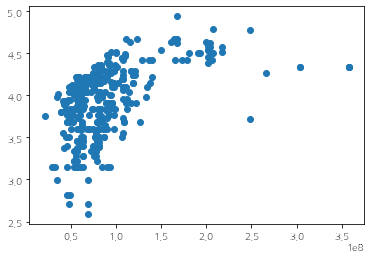

In [ ]:
#scatter plot
plt.scatter(df['공시가격'], df['log_보증금->월세']);

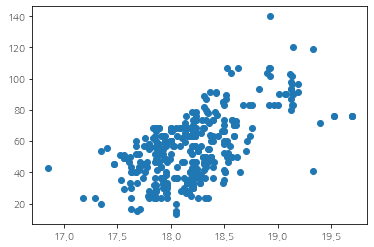

In [ ]:
#scatter plot
plt.scatter(df['log_공시가격'], df['보증금->월세']);

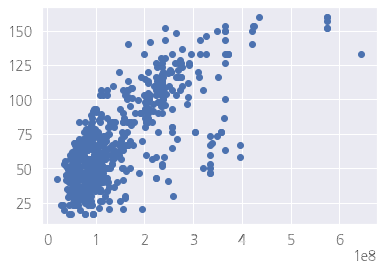

In [ ]:
#scatter plot
plt.scatter(df['공시가격'], df['보증금->월세']);

In [ ]:
df.head(10)

#to_csv

In [ ]:
df.to_csv('/content/gdrive/My Drive/recommend_system/tracer/preprocessed_2.csv', index=False, encoding='cp949')

#Reference

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python